In [2]:
import numpy as np

from embedding.structure import Struct
from embedding.schema import Schema
from embedding.encoder import Encoder

import matplotlib.pyplot as pl 

In [7]:
def rand_struct(depth, budget, branch_min, branch_max):
    lab = np.random.choice(sc.labels)
    branch = np.random.randint(branch_min, branch_max+1)
    attr = {}
    if depth == 1:
        return Struct.create(sc, (lab, attr)), 1, 1

    at = np.random.choice(sc.attributes, branch, replace=False)
    if len(at) == 0:
        return Struct.create(sc, (lab, attr)), 1, 1
    
    bs = np.ones_like(np.array(at), dtype=float)
    bs *= np.floor((budget-1)/len(at))
    bs[0] += budget - 1 - np.sum(bs)

    dd = []
    nl = []
    for a, b in zip(at, bs):
        if b == 0:
            dd.append(0)
            nl.append(0)
            continue
        attr[a], d, n = rand_struct(depth-1, b, branch_min, branch_max)
        dd.append(d)
        nl.append(n)
        
    return Struct.create(sc, (lab, attr)), max(dd)+1, sum(nl)+1

In [16]:
s, d, l = rand_struct(2, 10, 1,2)
s = s.to_indexes()
print(d, l)

print(s)
s2 = e.decode(e.encode(s))
print(s2)
s == s2

2 2
(87 2: (10))
(87 2: (10))


True

In [132]:
sc = Schema(labels=[str(x) for x in range(100)], attributes=[str(x) for x in range(4)])

dims = [x for x in range(2000,40,-10)]
N = 1000
res = np.zeros((N*len(dims), 4))
ii = -1
for dim in dims:
    e = Encoder(schema=sc, dim=dim, seed=42)
    print(dim)
    for i in range(N):
        ii += 1
        vv = np.random.randint(5, 25)
        s, d, l = rand_struct(vv, vv, 1,4)
        s = s.to_indexes()
        res[ii,0] = l
        res[ii,1] = d
        res[ii,2] = dim
        try:
            s2 = e.decode(e.encode(s))
        except ValueError:
            continue
        if s2 is None:
            continue

        if s == s2:
            res[ii,3] = 1

agg = {}
nn = {}
for r in res:
    k = (r[0],r[2])
    if k in agg:
        agg[k] += r[3]
        nn[k] += 1
    else:
        agg[k] = r[3]
        nn[k] = 1

2000
1990
1980
1970
1960
1950
1940
1930
1920
1910
1900
1890
1880
1870
1860
1850
1840
1830
1820
1810
1800
1790
1780
1770
1760
1750
1740
1730
1720
1710
1700
1690
1680
1670
1660
1650
1640
1630
1620
1610
1600
1590
1580
1570
1560
1550
1540
1530
1520
1510
1500
1490
1480
1470
1460
1450
1440
1430
1420
1410
1400
1390
1380
1370
1360
1350
1340
1330
1320
1310
1300
1290
1280
1270
1260
1250
1240
1230
1220
1210
1200
1190
1180
1170
1160
1150
1140
1130
1120
1110
1100
1090
1080
1070
1060
1050
1040
1030
1020
1010
1000
990
980
970
960
950
940
930
920
910
900
890
880
870
860
850
840
830
820
810
800
790
780
770
760
750
740
730
720
710
700
690
680
670
660
650
640
630
620
610
600
590
580
570
560
550
540
530
520
510
500
490
480
470
460
450
440
430
420
410
400
390
380
370
360
350
340
330
320
310
300
290
280
270
260
250
240
230
220
210
200
190
180
170
160
150
140
130
120
110
100
90
80
70
60
50


In [191]:
aa = []
for (l,d), v in agg.items():
    if 200<=d <=2000:
        aa.append([int(l), int(d), v/nn[(l,d)], nn[(l,d)]])
aa = np.array(aa)

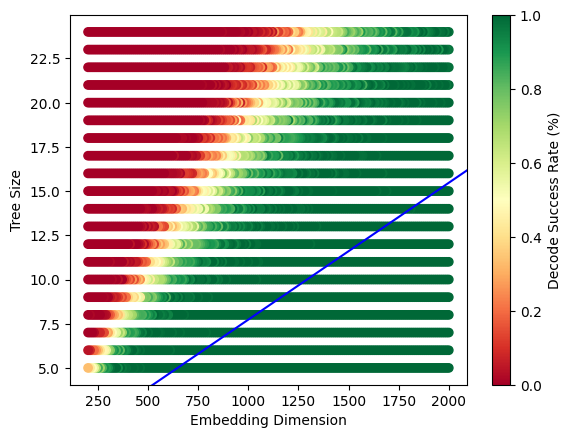

In [199]:
aaa = aa[aa[:,2]<1,:]
sl = min(aaa[:,0]/aaa[:,1])

pl.scatter(aa[:,1],aa[:,0], c=aa[:,2], cmap='RdYlGn')
pl.colorbar().set_label('Decode Success Rate (%)')
pl.xlabel('Embedding Dimension')
pl.ylabel('Tree Size')

x_limits = pl.gca().get_xlim()
y_limits = pl.gca().get_ylim()
pl.plot((200,2500),
        (200*sl, 2500*sl),
        color='#0000FF')
pl.xlim(x_limits)
pl.ylim(y_limits)

pl.savefig('rand_tree.png', dpi=300)

In [136]:
np.save('rand_tree.npy', res)

In [165]:
res.shape

(196000, 4)

In [197]:
sl

0.0077348066298342545

In [194]:
aaa

array([[6.0e+00, 2.0e+03, 1.0e+00, 4.4e+01],
       [5.0e+00, 2.0e+03, 1.0e+00, 5.6e+01],
       [2.0e+01, 2.0e+03, 1.0e+00, 5.7e+01],
       ...,
       [5.0e+00, 3.4e+02, 1.0e+00, 4.6e+01],
       [5.0e+00, 3.3e+02, 1.0e+00, 5.8e+01],
       [5.0e+00, 3.2e+02, 1.0e+00, 4.0e+01]])